In [12]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [70]:
df = pd.read_table('dat.txt', sep='\t')

In [71]:
df.head(10)

,obm,obT,rslt,rsl
0,10,9,1,0
1,10,8,1,0
2,10,7,1,0
3,10,6,1,0
4,10,5,1,0
5,10,4,1,2
6,10,3,1,2
7,10,2,1,2
8,10,1,1,2
9,9,9,1,0


In [16]:
train_data = df.sample(frac=0.7)
train_data

,obm,obT,rslt,rsl
37,6,8,0,0
41,6,4,0,0
25,8,2,1,2
61,4,2,0,0
70,3,2,0,0
...,...,...,...,...
20,8,7,0,0
71,3,1,0,0
68,3,4,0,0
57,4,6,0,0


In [323]:
subdf = df[['obm','obT','rslt']]
subdf.head()

,obm,obT,rslt
0,10,9,0
1,10,8,0
2,10,7,0
3,10,6,1
4,10,5,1


In [324]:
rslt_dummies = pd.get_dummies(subdf.rslt, prefix="rslt")
df_with_dummies = pd.concat([subdf,rslt_dummies],axis='columns')

In [326]:
df_with_dummies.head(10)

,obm,obT,rslt,rslt_0,rslt_1,rslt_2
0,10,9,0,1,0,0
1,10,8,0,1,0,0
2,10,7,0,1,0,0
3,10,6,1,0,1,0
4,10,5,1,0,1,0
5,10,4,2,0,0,1
6,10,3,2,0,0,1
7,10,2,2,0,0,1
8,10,1,2,0,0,1
9,9,9,0,1,0,0


In [330]:
df_with_dummies.drop('rslt',axis='columns',inplace=True)
df_with_dummies.head(10)

,obm,obT,rslt_0,rslt_1,rslt_2
0,10,9,1,0,0
1,10,8,1,0,0
2,10,7,1,0,0
3,10,6,0,1,0
4,10,5,0,1,0
5,10,4,0,0,1
6,10,3,0,0,1
7,10,2,0,0,1
8,10,1,0,0,1
9,9,9,1,0,0


In [332]:
X = df_with_dummies
X.head(10)

,obm,obT,rslt_0,rslt_1,rslt_2
0,10,9,1,0,0
1,10,8,1,0,0
2,10,7,1,0,0
3,10,6,0,1,0
4,10,5,0,1,0
5,10,4,0,0,1
6,10,3,0,0,1
7,10,2,0,0,1
8,10,1,0,0,1
9,9,9,1,0,0


In [333]:
y = df.rslt

In [334]:
y

0     0
1     0
2     0
3     1
4     1
     ..
85    0
86    0
87    0
88    0
89    0
Name: rslt, Length: 90, dtype: int64

In [336]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9)

In [337]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [338]:
model.fit(X_train, y_train)

C:\Users\aveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [339]:
model.predict(X_test)

array([0, 1, 2, 0, 1, 0, 0, 1, 0], dtype=int64)

In [341]:
model.score(X_train,y_train)

1.0

In [342]:
X_test

,obm,obT,rslt_0,rslt_1,rslt_2
48,5,6,1,0,0
31,7,5,0,1,0
16,9,2,0,0,1
42,6,3,1,0,0
14,9,4,0,1,0
54,4,9,1,0,0
83,1,7,1,0,0
13,9,5,0,1,0
63,3,9,1,0,0


In [404]:
for i in range(81):
    i1,i2,i3=rslt_dummies.values[i]
    a=[[10,4,i1,i2,i3]]
    print(f' {a}  {model.predict(a)} ')

 [[10, 4, 1, 0, 0]]  [0] 
 [[10, 4, 1, 0, 0]]  [0] 
 [[10, 4, 1, 0, 0]]  [0] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 0, 0, 1]]  [2] 
 [[10, 4, 0, 0, 1]]  [2] 
 [[10, 4, 0, 0, 1]]  [2] 
 [[10, 4, 0, 0, 1]]  [2] 
 [[10, 4, 1, 0, 0]]  [0] 
 [[10, 4, 1, 0, 0]]  [0] 
 [[10, 4, 1, 0, 0]]  [0] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 0, 0, 1]]  [2] 
 [[10, 4, 0, 0, 1]]  [2] 
 [[10, 4, 0, 0, 1]]  [2] 
 [[10, 4, 1, 0, 0]]  [0] 
 [[10, 4, 1, 0, 0]]  [0] 
 [[10, 4, 1, 0, 0]]  [0] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 0, 0, 1]]  [2] 
 [[10, 4, 0, 0, 1]]  [2] 
 [[10, 4, 1, 0, 0]]  [0] 
 [[10, 4, 1, 0, 0]]  [0] 
 [[10, 4, 1, 0, 0]]  [0] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 0, 1, 0]]  [1] 
 [[10, 4, 1, 0, 0]]  [0] 
 [[10, 4, 1, 0, 0]]  [0] 
 [[10, 4, 1,

array([2], dtype=int64)

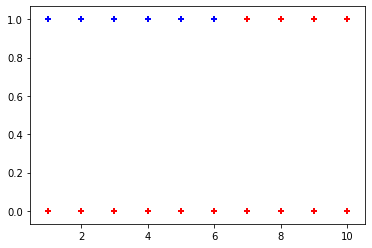

In [17]:
from homemade.logistic_regression import LogisticRegression
plt.scatter(df['obT'],df.rslt,marker='+',color='blue')
plt.scatter(df['obm'],df.rslt,marker='+',color='red')

In [18]:
test_data = df.drop(train_data.index)
test_data

,obm,obT,rslt,rsl
0,10,9,0,0
4,10,5,1,0
11,9,7,0,0
12,9,6,1,0
14,9,4,1,0
17,9,1,1,2
19,8,8,0,0
22,8,5,1,0
26,8,1,1,2
27,7,9,0,0


In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model1 = LogisticRegression()

In [73]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df[['obm','obT']],df[['rslt','rsl']],train_size=0.8)
X_train1, X_test1, y_train1, y_test1 = train_test_split(df[['obm','obT']],df[['rslt']],train_size=0.8)


In [96]:
X_test

,obm,obT
2,10,7
7,10,2
0,10,9
29,7,7
82,1,8
81,1,9
41,6,4
69,3,3
24,8,3
61,4,2


In [97]:
model.fit(X_train, y_train['rslt'])
model1.fit(X_train, y_train['rsl'])


C:\Users\aveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
X_test1

,obm,obT
68,3,4
17,9,1
78,2,3
28,7,8
33,7,3
41,6,4
21,8,6
61,4,2
9,9,9
7,10,2


In [99]:
y_predicted = model.predict(X_test1)
y_predicted1 = model1.predict(X_test1)

In [100]:
y_predicted

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [101]:
y_predicted1

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0], dtype=int64)

In [84]:
model.predict([[5,1]])

array([1], dtype=int64)

In [48]:
model.fit(X_train, y_train['rslt'])
model1.fit(X_train, y_train['rsl'])

C:\Users\aveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
x_predicted = model.predict(X_test)

In [39]:
x_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [40]:
model.predict_proba(X_test)

array([[0.8994912 , 0.1005088 ],
       [0.67846108, 0.32153892],
       [0.94560631, 0.05439369],
       [0.90632008, 0.09367992],
       [0.12263487, 0.87736513],
       [0.51580302, 0.48419698],
       [0.90123877, 0.09876123],
       [0.82449028, 0.17550972],
       [0.98661907, 0.01338093],
       [0.80994688, 0.19005312],
       [0.94659967, 0.05340033],
       [0.36313137, 0.63686863],
       [0.54490869, 0.45509131],
       [0.53038169, 0.46961831],
       [0.12055415, 0.87944585],
       [0.36764862, 0.63235138],
       [0.69521895, 0.30478105],
       [0.94757589, 0.05242411]])

In [43]:
model1.score(X_test,y_test['rsl'])

0.9444444444444444

In [35]:
X_test

,obm,obT
49,5,5
71,3,1
68,3,4
9,9,9
25,8,2
62,4,1
39,6,6
20,8,7
46,5,8
70,3,2


In [304]:
model.predict(X_train)

array([2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [305]:
model.predict(X_test)

array([0, 0, 0, 1, 2, 0, 0, 0, 0], dtype=int64)

In [306]:
model.predict([[10,4]])

array([2], dtype=int64)

In [307]:
model.predict([[84]])

ValueError: X has 1 features per sample; expecting 2

In [308]:
model.score(X_train,y_train)

0.8518518518518519

In [189]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [201]:
input_param_name = ['obm','obT']
input_param_name
output_param_name = ['rslt']
output_param_name

['rslt']

In [204]:
X_train

,obm,obT
29,7,7
81,1,9
40,6,5
60,4,3
23,8,4
...,...,...
49,5,5
20,8,7
59,4,4
80,2,1


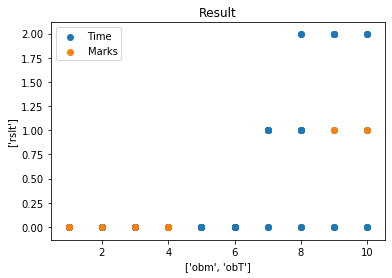

In [206]:
plt.scatter(X_train['obm'], y_train, label='Time')
plt.scatter(X_test['obm'], y_test, label='Marks')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('Result')
plt.legend()
plt.show()